Before reindexing:
            Birthrate
1960-01-01      5.921
1961-01-01      5.937
1962-01-01      5.953
1963-01-01      5.969
1964-01-01      5.979

After reindexing:
            Birthrate
1960-01-01      5.921
1961-01-01      5.937
1962-01-01      5.953
1963-01-01      5.969
1964-01-01      5.979
Valid observations for India after cleaning: 63


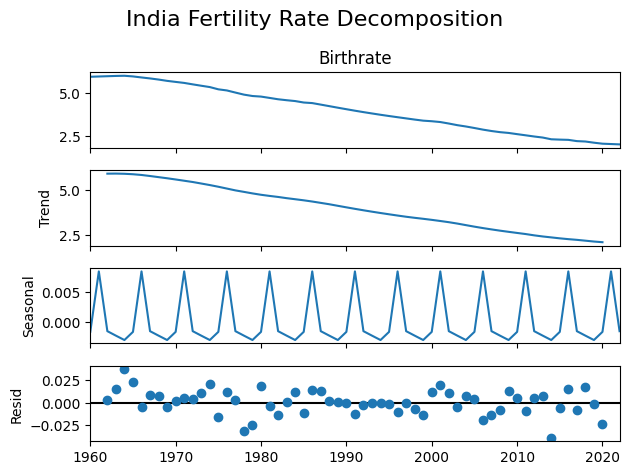

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load data
file_path = r"C:\Users\22150\Downloads\Birthrate.csv"
df = pd.read_csv(file_path, skiprows=4)

# Filter for India
country = 'India'
country_df = df[df['Country Name'] == country]

# Extract year columns (columns that are digits)
year_columns = [col for col in country_df.columns if col.isdigit()]
ts = country_df[year_columns].T
ts.columns = ['Birthrate']

# Convert index to datetime
ts.index = pd.to_datetime(ts.index, format='%Y')

# Ensure the 'Birthrate' column is numeric
ts['Birthrate'] = pd.to_numeric(ts['Birthrate'], errors='coerce')

# Drop any rows with NaN values (this step is very important)
ts = ts.dropna()

# Print the first few rows before reindexing
print("Before reindexing:")
print(ts.head())

# Reindex to make sure we have a continuous datetime index starting from '01-01'
ts = ts.reindex(pd.date_range(start='1960-01-01', end='2023-01-01', freq='YS'))

# Print the first few rows after reindexing
print("\nAfter reindexing:")
print(ts.head())

# Drop NaN values after reindexing
ts = ts.dropna()

# Double-check valid observations after cleaning
print(f"Valid observations for {country} after cleaning: {len(ts)}")

# Decompose the time series
decomposition = seasonal_decompose(ts['Birthrate'], model='additive', period=5)

# Plot the decomposition
decomposition.plot()
plt.suptitle(f"{country} Fertility Rate Decomposition", fontsize=16)
plt.tight_layout()
plt.show()
